# Instructions
- To start with, clone this git repo to your local environment or download all the files.

- Please provide your answers to this problem set **in this jupyter notebook only**. No additional files is accepted. However, you are free to create files or data on your local desktop (though that would be totally unnecessary for the content of this test).

- You are free to refer any open source materials, including books, documentations, google, stackoverflow, and any public internet resources. 

- You are supposed to finished the test independently, and may not directly seek help from another people, or copying code. 

- If you think you have seen exactly the same questions, or have dealt with a problem of the same structure, please let us know. If you do so, you will not be tested with a different problem set, and automatically will pass this interview round. 

- To submit this test, you can either:
    - Create a git repo and provide us with the access, or, 
    - Send the finished, unencrypted `problem_set.ipynb` jupyter notebook file to the email address provided to you.
    
- You have one day to finished this test. 
    - Feel free to ask for an extension if there's any special situation.
    - This problem set should take you about an hour or so to finish, if you really get stuck, try to think whether you're overcomplicating things.
    - Feel free to reach out if you find anything confusing.
    
- Good Luck!


In [1]:
# These libraries should be sufficient for the purpose of this test.
# However, you're free to import anything you like.

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

---

# Problem 1

`df1` is a timeseries of daily PnL indexed by dates. This data is simulated in the code block below.

**Questions:**
1. Compute the maximum drawdown of this period.
2. Write a function `top_drawdown(pnl: pd.Series, k: int)` that computes the top `k` drawdowns, and the corresponding start time, end time, and peak time of the drawdowns on the given `pnl` Series. 
    - Hint & Sanity check: the maximum drawdown value you computed in Q1 should be the output when $k=1$, and the date it occurs is, by definition, the peak time of the top 1 drawdown.

<AxesSubplot:>

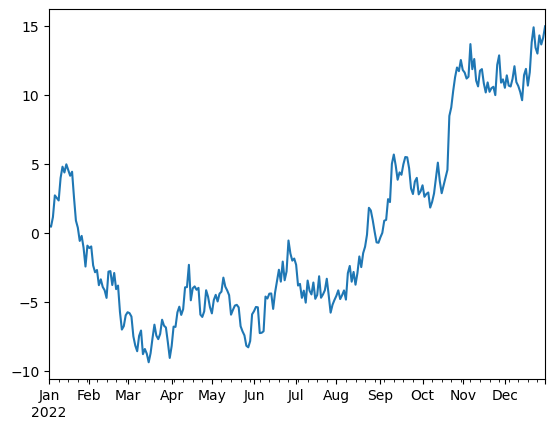

In [2]:
# This block simulates the data for problem 1.
# Do not change this random seed!!
np.random.seed(42)
dates = pd.bdate_range(
    pd.Timestamp('2022-01-01'), 
    pd.Timestamp('2022-12-31')
).normalize()
df1 = pd.DataFrame({
    'pnl':  np.random.normal(loc=0.05, scale=1.0, size=len(dates))
}, index=dates)
df1.pnl.cumsum().plot()

In [ ]:
# Your answer to Problem 1:










---

# Problem 2

`df2` is a dataframe of three columns. This data is simulated in the code block below.

- `df2.date`: The date, from 2022-01-01 to 2022-12-31.
- `df2.ticker`: Ticker of the stock.
- `df2.ret`: Daily return of that stock on that date.

There are 260 days (forget about market holidays) and 100 stocks, so `df2` has 26,000 rows.

**Questions:**
1. Which is the stock with highest annualized sharpe? 
$$
\text{Annualized Sharpe} = \frac{\text{Mean Daily Return}}{\text{Std of Daily Return}} \times \sqrt{260}
$$
2. For each stock, compute corresponding top 5 weeks in this year where they achieved highest weekly sharpe (weekly sharpe: simply mean weekly return / weekly std return, this is a sloppy definition but sufficient for our purpose). What are the total (sum of) weekly return in those stocks $\times$ weeks?

- Hint: The output contains 5 (weeks) $\times$ 100 (stocks) values, so you're supposed to compute 500 values in total.

        date  ticker       ret
0 2022-01-03       1  1.003428
1 2022-01-03       2 -0.266529
2 2022-01-03       3  1.305377
3 2022-01-03       4  3.056060
4 2022-01-03       5 -0.458307


<AxesSubplot:xlabel='date'>

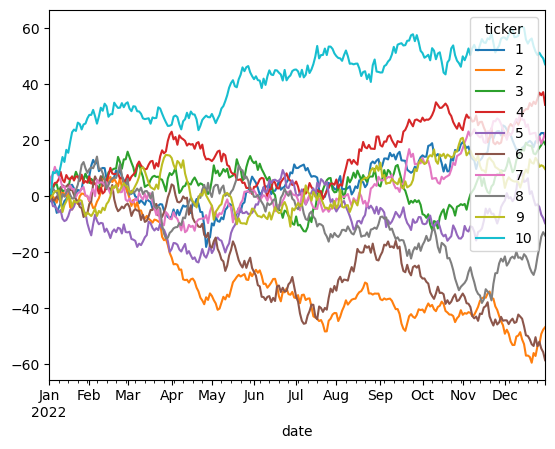

In [3]:
# This block simulates the data for problem 1.
# Do not change this random seed!!
np.random.seed(42)

tickers = np.arange(1, 101)
df2 = pd.DataFrame({
    'ret': np.random.normal(0.01, 2.0, size=len(tickers)*len(dates))
}, index=pd.MultiIndex.from_product([dates, tickers])).reset_index()
df2.columns = ['date', 'ticker', 'ret']
print(df2.head())

cpnl2 = df2.set_index(['date', 'ticker']).unstack().ret.cumsum(axis=0)
cpnl2.iloc[:, :10].plot()

In [ ]:
# Your answer to Problem 2:










# Bonus Problem

Dataset `bonus_problem.hdf` has four features:
- `y`: The future (forward-looking) stock returns we want to predict with other features.
- `x1`: Some unknown factor.
- `momentum`: The stock's exposure on momentum factor.
- `liquidity`: The stock's liquidity proxy.
It is multi-indexed by `date` and stock `ticker`. 

The dataset is simulated such that it has an artifical alpha, which allows you to predict `y` with other features in some capabilities. 

**Question**:

Try to explore the data, and find that alpha with any statistical tools you like (Note: **there's nothing fancy**).

In [4]:
# Try to predict fdf.y!
fdf = pd.read_hdf('bonus_problem.hdf', 'table')
fdf.head()

y        x1  momentum  liquidity
date       ticker                                         
2022-01-03 1      -0.066601  0.496714 -0.141343   0.497871
           2      -0.202429 -0.138264 -1.182520   1.074757
           3       0.022476  0.647689 -0.119706   1.069781
           4       0.297378  1.523030  0.147996   0.254765
           5       0.161759 -0.234153  0.518835   0.379696

In [5]:
# Your answer to Bonus Problem:








